In [9]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib pillow


Note: you may need to restart the kernel to use updated packages.


Please enter the file name of the photo (ex:123.png or 1234.jpg) :  123.png



------------------------------------------------------------------------------------------

Available Functions: 1. Horizontal Mirrored
                     2. Vertical Mirrored
                     3. Crop Image
                     4. Convert to Black and White
                     5. Adjust Brightness

------------------------------------------------------------------------------------------



Please select function(s) separated by commas (1,2,3):  5



------------------------------------------------------------------------------------------



Enter the brightness factor:  1.2


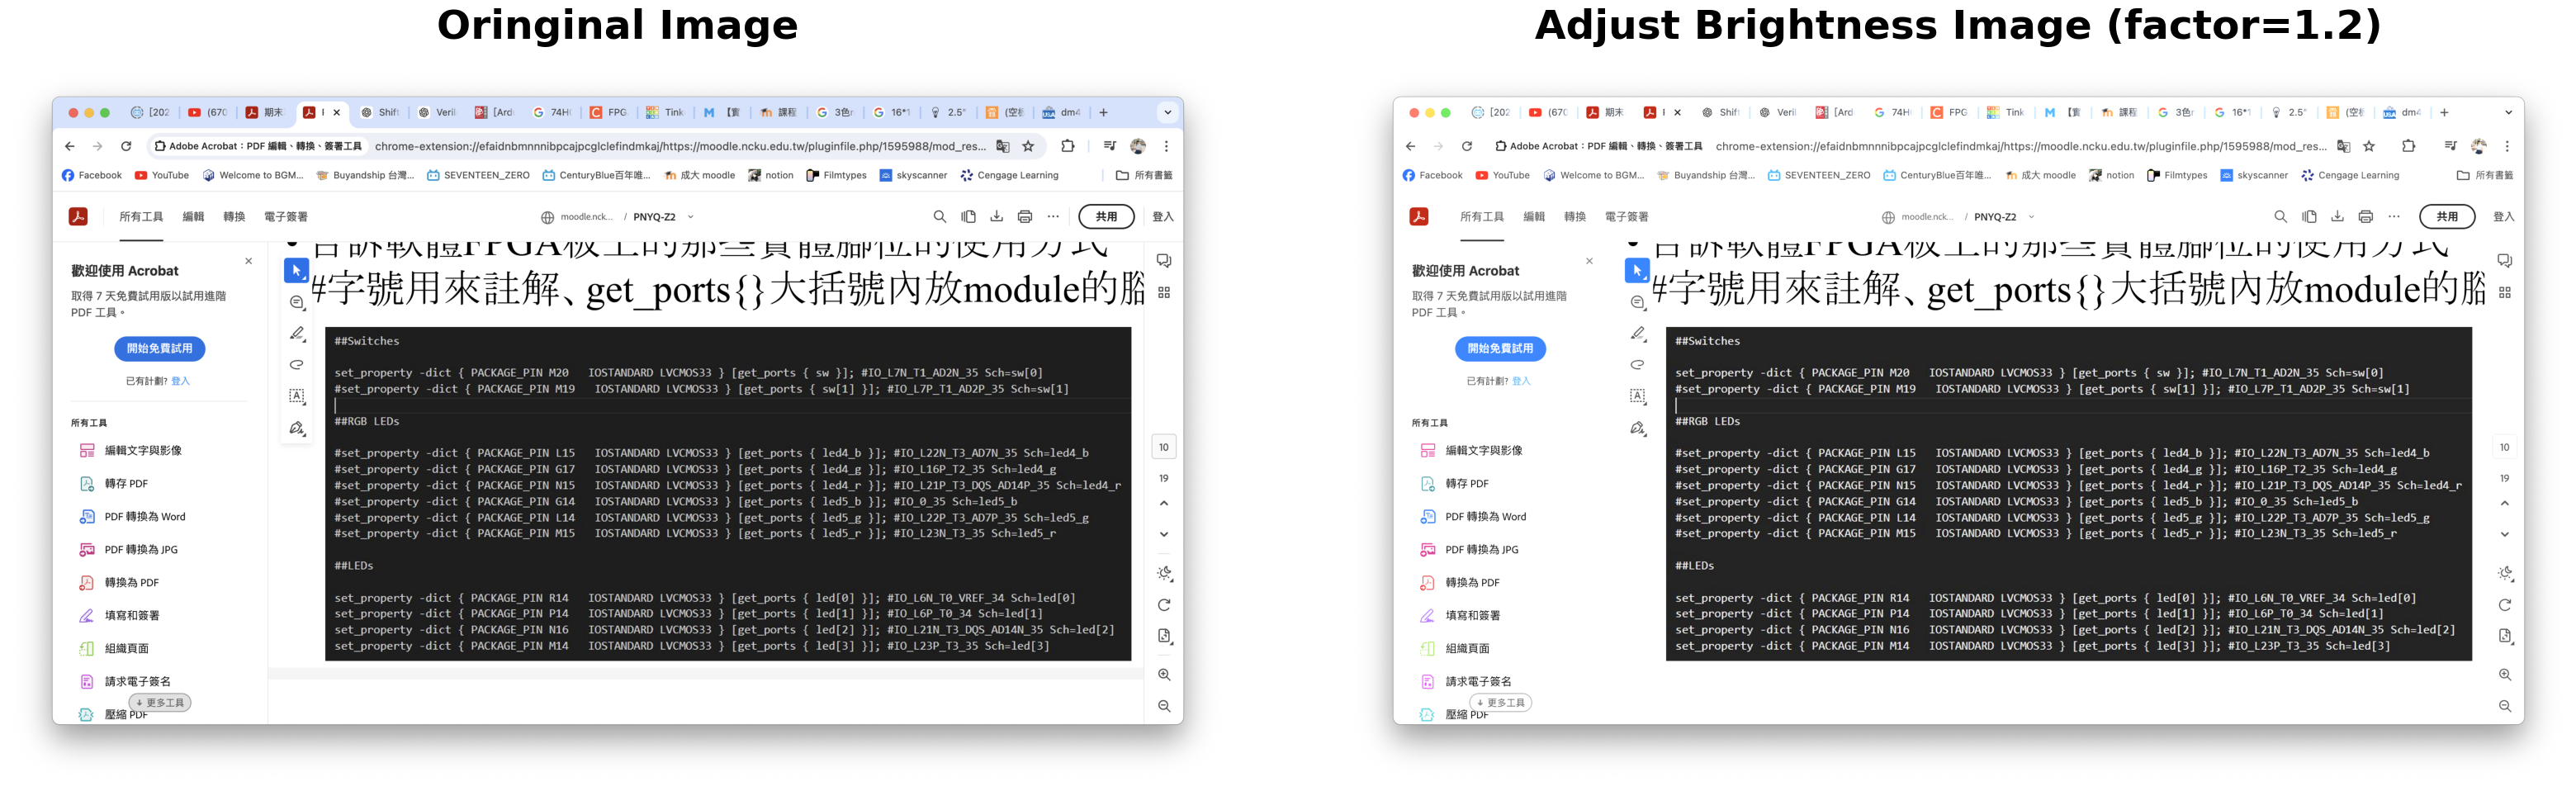


------------------------------------------------------------------------------------------



KeyboardInterrupt: Interrupted by user

Do you want to continue? (Y/N):  n


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageOps, UnidentifiedImageError, ImageEnhance

def open_image():
    count = 0
    while True:
        try:
            filename = input('Please enter the file name of the photo (ex:123.png or 1234.jpg) : ')
            print()
            image = Image.open(filename) # 打開圖片
            print('------------------------------------------------------------------------------------------')
            return image, filename
        
        except FileNotFoundError:
            print('-------------------------------- File Not Found ------------------------------------------ ')
            count += 1  # 增加計數器
            if count > 2:
                print()
                print('                 Please make sure the file is in the folder.')
                print()
                print('------------------------------------------------------------------------------------------')
            print()
            
        except UnidentifiedImageError:
            print('Unrecognized Image File')
            print()

# ---------------------------------------------------------------------------------------------------------------------- #   
# 功能函數 #
            
def horizontal_mirrored(image_array):
    mirror_matrix = np.array([[0, 1], [1, 0]])  # 水平鏡像矩陣
    horizontal_mirrored = np.zeros_like(image_array) # 創建與輸入圖像相同形狀的空白圖像
    
    rows, cols, channels = image_array.shape # 獲取輸入圖像的行、列和通道數
    for row in range(rows):
        for col in range(cols):
            horizontal_mirrored[row, col] = image_array[row, cols - col - 1] # 將每個像素列進行反轉
    
    return horizontal_mirrored


def vertical_mirrored(image_array):
    vertical_mirrored = np.zeros_like(image_array) # 創建與輸入圖像相同形狀的空白圖像
    
    rows, cols, channels = image_array.shape # 獲取輸入圖像的行、列和通道數
    for row in range(rows):
        vertical_mirrored[row, :, :] = image_array[rows - row - 1, :, :] 
    
    return vertical_mirrored


def crop_image(image_array, x1, y1, x2, y2):
    cropped_image_array = image_array[y1:y2, x1:x2] # 從原始圖像陣列中提取裁剪區域
    return cropped_image_array

# 將圖片轉換為黑白（灰度圖）
def rgb_to_gray(image_array):
    gray_matrix = np.array([0.299, 0.587, 0.114]) # 定義轉換矩陣
    
    gray_values = np.dot(image_array[:, :, :3], gray_matrix) # 將每個像素的 RGB 值乘以轉換矩陣並求和，得到灰度值
    
    gray_values = gray_values.astype(np.uint8) # 將灰度值轉換為整數（0~255）
    
    return gray_values

def adjust_brightness(image_array, factor):
    image_array_float = image_array.astype(np.float32)  # 將圖像陣列轉換為浮點數型態
    
    # 定義調整亮度的矩陣
    brightness_matrix = np.array([[factor, 0, 0, 0],
                                  [0, factor, 0, 0],
                                  [0, 0, factor, 0],
                                  [0, 0, 0, 1]], dtype=np.float32)
    
    rows, cols, channels = image_array.shape # 獲取圖像的行數、列數和通道數
    
    flat_image_array = image_array.reshape(-1, 4) # 將圖像陣列重塑為一維陣列
    
    adjusted_image_array = np.dot(flat_image_array, brightness_matrix.T) # 使用矩陣乘法調整亮度
    
    adjusted_image_array = np.clip(adjusted_image_array, 0, 255).astype(np.uint8).reshape(rows, cols, channels) # 將調整後的像素值限制在0~255之間並轉換為整數型態
    
    return adjusted_image_array


# ---------------------------------------------------------------------------------------------------------------------- #           

def main():
    
    images_to_show = []  # 存儲要顯示的圖片
    titles = []  # 存儲每個圖片的標題
    grayscale_flags = []  # 存儲每個圖片是否為灰度圖像的標記
    
    while True:     
        
        image, filename = open_image() # 讀取圖片
        image_array = np.array(image) # 將圖片轉換為NumPy陣列
                
        images_to_show.append(image_array) # 保存原始圖片
        titles.append("Oringinal Image")
        grayscale_flags.append(len(image_array.shape) == 2)  # 原始圖片是否是灰度圖像
        
        
        
        while True:
            print()
            print("Available Functions: 1. Horizontal Mirrored")
            print("                     2. Vertical Mirrored")
            print("                     3. Crop Image")
            print("                     4. Convert to Black and White")
            print("                     5. Adjust Brightness")
            print()
            print('------------------------------------------------------------------------------------------')
            print()
            
            choices = input("Please select function(s) separated by commas (1,2,3): ")
            print()
            choices = choices.split(',')  # 將輸入分割成選項列表

            # 驗證輸入的選項是否有效
            valid_choices = {'1', '2', '3', '4', '5'}
            if not set(choices).issubset(valid_choices):
                print()
                print("------------------------ Invalid input ( Please try again ) ------------------------------ ")
            else:
                break
        
        # ------------------------------------------------------------------------------ #
        
        for choice in choices:
            if choice == '1':
                
                fh_image_array = horizontal_mirrored(image_array) # 水平鏡像

                fh_image = Image.fromarray(fh_image_array.astype(np.uint8)) # 將鏡像後的陣列轉換回圖片
                
                 # 保存鏡像圖片
                base_filename, ext = os.path.splitext(filename)  # 分割文件名和副檔名
                fh_image.save(f'{base_filename}_flipped_horizontal.png')
                
                images_to_show.append(fh_image) # 存儲要顯示的圖片
                titles.append("Horizontal Mirroring")
                grayscale_flags.append(len(fh_image_array.shape) == 2)  # 水平鏡像後的圖片是否是灰度圖像
                
            elif choice == '2':

                fv_image_array = vertical_mirrored(image_array) # 水平鏡像
                fv_image = Image.fromarray(fv_image_array) # 將鏡像後的陣列轉換回圖片

                 # 保存鏡像圖片
                base_filename, ext = os.path.splitext(filename)  # 分割文件名和副檔名
                fv_image.save(f'{base_filename}_flipped_vertical.png')

                images_to_show.append(fv_image) # 存儲要顯示的圖片
                titles.append("Vertical Mirroring")
                grayscale_flags.append(len(fv_image_array.shape) == 2)  # 垂直鏡像後的圖片是否是灰度圖像
                
            elif choice == '3' :
                
                # 顯示原始圖片並附上座標網格
                plt.imshow(image_array)
                plt.title("Original Image with Coordinates", fontsize=15, fontweight='bold', pad=10)
                plt.grid(True, which='both', color='orange', linestyle='--', linewidth=1.5)
                plt.show()

                x1 = int(input("Enter the left coordinate for cropping: "))
                x2 = int(input("Enter the right coordinate for cropping: "))
                y1 = int(input("Enter the upper coordinate for cropping: "))
                y2 = int(input("Enter the lower coordinate for cropping: "))
                print()
                
                cropped_image_array = crop_image(image_array, x1, y1, x2, y2)
                cropped_image = Image.fromarray(cropped_image_array.astype(np.uint8)) # 將裁切後的陣列轉換回圖片
            
                
                 # 保存裁切圖片
                base_filename, ext = os.path.splitext(filename)  # 分割文件名和副檔名
                cropped_image.save(f'{base_filename}_cropped.png')

                images_to_show.append(cropped_image) # 存儲要顯示的圖片
                titles.append("Cropped Image")
                grayscale_flags.append(len(cropped_image_array.shape) == 2)  # 裁切後的圖片是否是灰度圖像

            elif choice == '4':
                # 將圖片轉換為黑白（灰度圖）
                gray_values = rgb_to_gray(image_array)
                # 創建灰度圖像
                gray_image = Image.fromarray(gray_values)

                # 保存黑白圖片
                base_filename, ext = os.path.splitext(filename)
                gray_image.save(f'{base_filename}_RGB_to_gray.png')

                images_to_show.append(gray_image)
                titles.append("B/W Image")
                grayscale_flags.append(True)  # 這是一個灰度圖像
                
            elif choice == '5':
                image_array = image_array.astype(np.uint8)
                print('------------------------------------------------------------------------------------------')
                print()
                while True:
                    factor_input = input("Enter the brightness factor: ")
                    print()
                    if factor_input.isnumeric() or (factor_input.count('.') == 1 and factor_input.replace('.', '').isnumeric()):
                        factor = float(factor_input)
                        break
                    else:
                        print("------ Invalid input ( Please enter a valid number for the brightness factor ) ----------- ")
                        print()
                        continue

                # 調整亮度
                adjusted_image_array = adjust_brightness(image_array, factor)
                adjust_brightness_image = Image.fromarray(adjusted_image_array.astype(np.uint8)) # 將調整亮度後的陣列轉換回圖片

                # 保存圖片
                base_filename, ext = os.path.splitext(filename)  # 分割文件名和副檔名
                adjust_brightness_image.save(f'{base_filename}_adjust_brightness.png')

                images_to_show.append(adjust_brightness_image) # 存儲要顯示的圖片
                titles.append(f'Adjust Brightness Image (factor={factor})')
                grayscale_flags.append(len(adjusted_image_array.shape) == 2)  # 調整亮度後的圖片是否是灰度圖像
                

        # 最後顯示所有存儲的圖片
        num_images = len(images_to_show)
        num_cols = min(len(images_to_show), 2)  # 計算列數，最多兩列
        num_rows = (len(images_to_show) + 1) // 2  # 計算行數
        fig, axs = plt.subplots(num_rows, 2, figsize=(40, 30))
                
        # 調整子圖之間的距離
        plt.subplots_adjust(wspace=0.1, hspace=0.15)  # 設置子圖之間的水平和垂直間距

        for i, (image_to_show, is_grayscale) in enumerate(zip(images_to_show, grayscale_flags)):
            if num_rows > 1:
                row = i // num_cols
                col = i % num_cols
                if is_grayscale:  # 如果這是一張灰度圖像
                    axs[row, col].imshow(image_to_show, cmap='gray')  # 使用灰度圖顯示
                else:
                    axs[row, col].imshow(image_to_show)
                axs[row, col].set_title(titles[i], fontsize=35, fontweight='bold', pad=25)  # 設置標題
                axs[row, col].axis('off')
            else:
                if is_grayscale:  # 如果這是一張灰度圖像
                    axs[i].imshow(image_to_show, cmap='gray')  # 使用灰度圖顯示
                else:
                    axs[i].imshow(image_to_show)
                axs[i].set_title(titles[i], fontsize=35, fontweight='bold', pad=25)  # 設置標題
                axs[i].axis('off')

            
        # 隱藏多餘的子圖
        for i in range(num_images, num_rows * 2):
            axs[i // 2, i % 2].axis('off')


        plt.show()
                
        print()
        print('------------------------------------------------------------------------------------------')
        print()
        
        # ------------------------------------------------------------------------------ #
            
        # 詢問使用者是否繼續
        while True:
            
            choice = input("Do you want to continue? (Y/N): ").lower()
            if choice in ('Y', 'y') :
                
                # 清空 titles 和 images_to_show
                titles = []
                images_to_show = []
                
                break
                
            elif choice in ('N', 'n'):
                print()
                print('---------------------------------------- EXIT ----------------------------------------')
                return
            
            else:
                print()
                print("-------------------- Invalid input ( Please enter 'Y' or 'N' ) ------------------- ")
                print()
            
if __name__ == "__main__":
    main()